In [1]:
pip install opencv-python

You should consider upgrading via the '/home/studio-lab-user/.conda/envs/env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install glib=2.51.0 -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [77]:
import cv2
import numpy as np
from PIL import Image
from random import randint
import os

In [86]:
def createGaussianBlurredImage(file, pathToImgs):
    # Blur image
    if ".png" not in file:
        return
    image = cv2.imread(pathToImgs + file)
    blur = cv2.GaussianBlur(image,(11,11),0)
    cv2.imwrite("blurred data/" + file, blur)

In [87]:
pathToImgs = "/home/studio-lab-user/data/images_sample_resized/"
files = os.listdir(pathToImgs)
for i, file in enumerate(files):
    if ".png" not in file:
        print(i)
print(files[10016])

10016
.ipynb_checkpoints


In [ ]:
nAugmented = 1
for file in files:
    createGaussianBlurredImage(file, pathToImgs)
    if nAugmented in np.arange(start = 0,stop = len(files), step = 1000):
        print(f"Files left: {len(files) - nAugmented}")
    nAugmented += 1

Files left: 9017
Files left: 8017
Files left: 7017
Files left: 6017
Files left: 5017
Files left: 4017
Files left: 3017
Files left: 2017
Files left: 1017


In [9]:
def getRandomPixels(pixelSize, nBlackOuts):
    xDirection = np.arange(0,pixelSize)
    np.random.shuffle(xDirection)
    xDirection = xDirection[:nBlackOuts]
    return xDirection

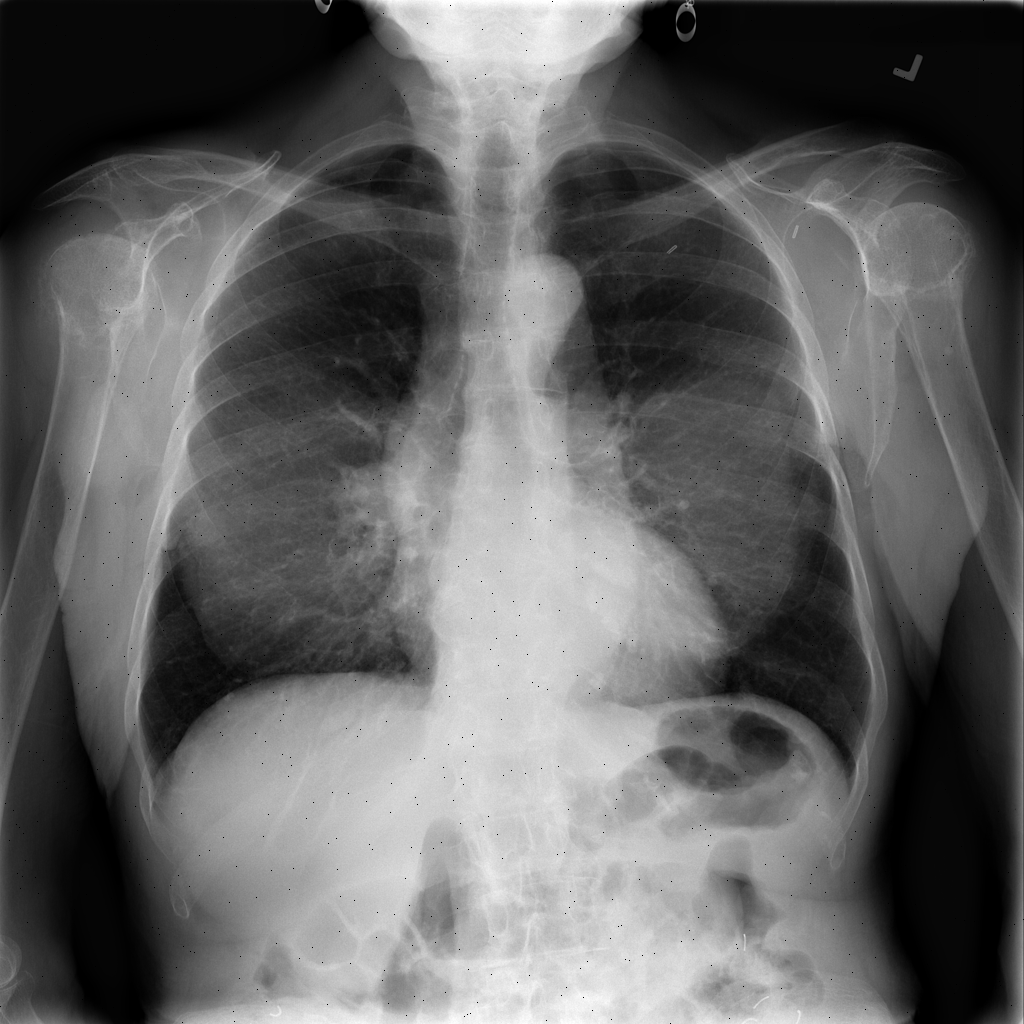

In [12]:
# Black out random pixels of the image
h, w = image.shape[:2]
xDirection = getRandomPixels(w, 10000)
yDirection = getRandomPixels(h, 10000)
blackedOutImageArray = np.array(image)
blackedOutImageArray[xDirection, yDirection] = (0, 0, 0)
blackedOutImage = Image.fromarray(blackedOutImageArray)
blackedOutImage.show()
blackedOutImage.save("blackedOutImage.jpg")

In [13]:
def getBlackedOutImage(imageName, width, height):
    thickness = -1
    color = (0, 0, 0)
    image = cv2.imread(imageName)
    h, w = image.shape[:2]
    xStart = randint(0, w)
    yStart = randint(0, h)
    if xStart + width > w:
        width = w
    if yStart + height > h:
        height = h
    startPoint = (int(xStart), int(xStart + width))
    endPoint = (int(yStart), int(yStart + height))
    imageBlackedOut = cv2.rectangle(image, startPoint, endPoint, color, thickness)
    cv2.imwrite("blacked_out_image.jpg", imageBlackedOut)
    returnMessage = f"Blacked out in: x direction {xStart} : {xStart + width} in y direction {yStart} : {yStart + height}" 
    return returnMessage

In [16]:
getBlackedOutImage('sample.png',200,300)

'Blacked out in: x direction 578 : 778 in y direction 38 : 338'